In [1]:
from keras.models import Sequential
from skimage import io
from skimage import transform
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import os
from keras.layers import *
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
from PIL import Image
import argparse
import math
from keras import backend as K

Using TensorFlow backend.


In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://bamos.github.io/data/2016-08-09/gen-architecture.png")

In [13]:
def generator_model():
    model = Sequential([
        Dense(1024*4*4, input_dim=100, activation=LeakyReLU(0.2)),
        BatchNormalization(),
        Reshape((4,4,1024)),
        UpSampling2D(),
        Conv2D(512, (5, 5), padding='same', activation=LeakyReLU(0.2)),
        BatchNormalization(),
        UpSampling2D(),
        Conv2D(256,(5, 5), padding='same', activation='tanh'),
        BatchNormalization(),
        UpSampling2D(),
        Conv2D(128, (5, 5), padding='same', activation='tanh'),
        BatchNormalization(),
        UpSampling2D(),
        Conv2D(3,(5, 5), padding='same', activation='tanh')
    ])
    return model


In [14]:
m1=generator_model().summary()
print(m1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16384)             1654784   
_________________________________________________________________
batch_normalization_10 (Batc (None, 16384)             65536     
_________________________________________________________________
reshape_4 (Reshape)          (None, 4, 4, 1024)        0         
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 8, 8, 1024)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 512)         13107712  
_________________________________________________________________
batch_normalization_11 (Batc (None, 8, 8, 512)         2048      
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 16, 16, 512)       0         
__________

In [5]:
Image(url= "http://bamos.github.io/data/2016-08-09/discrim-architecture.png")

In [19]:
def discriminator_model():
    model = Sequential([
        Conv2D(64, (5, 5), input_shape=(64,64,3), padding='same', activation=LeakyReLU(0.2)),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        Convolution2D(128, (5, 5), padding='same', activation=LeakyReLU(0.2)),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        Convolution2D(256, (5, 5), padding='same', activation=LeakyReLU(0.2)),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        Convolution2D(512, (5, 5), padding='same', activation=LeakyReLU(0.2)),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

In [20]:
print(discriminator_model().summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 128)       204928    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 256)       819456    
__________

In [8]:
def generator_containing_discriminator(g, d):
    model = Sequential()
    model.add(g)
    d.trainable = False
    model.add(d)
    return model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
imgs=os.listdir('/home/shubham/DCGAN/img_align_celeba_64')
l=[]
for j,i in enumerate(imgs):
    l.append(io.imread('/home/shubham/DCGAN/img_align_celeba_64/'+i))
x_complete=np.array(l)
plt.imshow(x_complete[0])
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

/home/shubham/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


IOError: cannot identify image file <open file '/home/shubham/DCGAN/img_align_celeba_64/Legends of Tomorrow 3.desktop', mode 'rb' at 0x7fb17d856f60>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

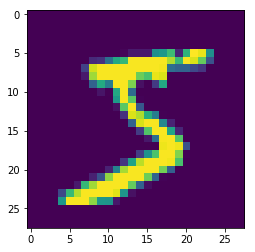

In [11]:
plt.imshow(X_train[0])

In [12]:
X_train=X_train.astype(np.float32)

In [13]:
print(X_train.shape)
print(type(X_train))

(60000, 28, 28)
<type 'numpy.ndarray'>


In [14]:
X_train=(X_train-127.5)/127.5

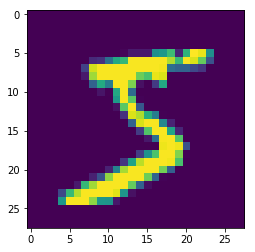

In [15]:
plt.imshow(X_train[0])

In [16]:
print(X_train[0])

[[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.        

In [17]:
X_train = X_train[:, :, :, None]
X_test = X_test[:, :, :, None]

In [18]:
print(X_train.shape)

(60000, 28, 28, 1)


In [19]:
def combine_images(generated_images):
    num = generated_images.shape[0]
    width = int(math.sqrt(num))
    height = int(math.ceil(float(num)/width))
    shape = generated_images.shape[1:3]
    image = np.zeros((height*shape[0], width*shape[1]),
                     dtype=generated_images.dtype)
    for index, img in enumerate(generated_images):
        i = int(index/width)
        j = index % width
        image[i*shape[0]:(i+1)*shape[0], j*shape[1]:(j+1)*shape[1]] = \
            img[:, :, 0]
    return image

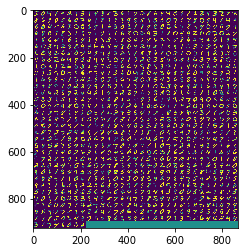

In [20]:
img=combine_images(X_train[0:1000])
plt.imshow(img)
from PIL import Image
Image.fromarray(img.astype(np.uint8)).save(
                   "sample"+".png")

In [21]:
[1]*12 + [0]*9

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
mask=np.ones((64,64))

In [23]:
mask[24:40,24:40]=0.0


In [24]:

print(mask)


[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [76]:
def custom_loss(y_true,y_pred):
    loss=0.
    res1=K.variable(value=y_true)
    res2=K.variable(value=y_pred)
    for i in range(int(y_true.shape[0])):
        res1=np.multiply(mask,y_true[i,:,:,0])
        res2=np.multiply(mask,y_pred[i,:,:,0])
        los=abs(res1-res2)
        loss+=sum(sum(abs(los)))
    return 0.1*loss
    

In [25]:
def train(BATCH_SIZE):
    d = discriminator_model()
    g= generator_model()
    d_on_g = generator_containing_discriminator(g, d)
    d_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
    g_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
    g.compile(loss= 'hinge_loss', optimizer="adam")
    d_on_g.compile(loss='binary_crossentropy', optimizer='adam')
    d.trainable = True
    d.compile(loss='binary_crossentropy', optimizer='adam')
    for epoch in range(10):
        print("Epoch is", epoch)
        print("Number of batches", int(X_train.shape[0]/BATCH_SIZE))
        for index in range(int(X_train.shape[0]/BATCH_SIZE)):
            noise = np.random.uniform(-1, 1, size=(BATCH_SIZE, 100))
            image_batch = X_train[index*BATCH_SIZE:(index+1)*BATCH_SIZE]
            generated_images = g.predict(noise, verbose=0)
            if index % 20 == 0:
                image = combine_images(generated_images)
                image = image*127.5+127.5
                Image.fromarray(image.astype(np.uint8)).save(
                    str(epoch)+"_"+str(index)+".png")
            X = np.concatenate((image_batch, generated_images))
            y = [1] * BATCH_SIZE + [0] * BATCH_SIZE
            d_loss = d.train_on_batch(X, y)
            print("batch %d d_loss : %f" % (index, d_loss))
            noise = np.random.uniform(-1, 1, (BATCH_SIZE, 100))
            d.trainable = False
            g_loss = d_on_g.train_on_batch(noise, [1] * BATCH_SIZE)
            g1_loss= g.train_on_batch(noise,generated_images) #for mG(z)-m(Y)
            print("batch %d g1_loss : %f" % (index, g1_loss))
            d.trainable = True
            print("batch %d g_loss : %f" % (index, g_loss))
            if index % 10 == 9:
                g.save_weights('generator', True)
                d.save_weights('discriminator', True)


In [80]:
train(128)

('Epoch is', 0)
('Number of batches', 468)
batch 0 d_loss : 0.730649
batch 0 g1_loss : 0.240129
batch 0 g_loss : 0.776239
batch 1 d_loss : 0.723530
batch 1 g1_loss : 0.232085
batch 1 g_loss : 0.767185
batch 2 d_loss : 0.708389
batch 2 g1_loss : 0.230493
batch 2 g_loss : 0.753768
batch 3 d_loss : 0.690191
batch 3 g1_loss : 0.226204
batch 3 g_loss : 0.742533
batch 4 d_loss : 0.671703
batch 4 g1_loss : 0.222564
batch 4 g_loss : 0.736073
batch 5 d_loss : 0.657287
batch 5 g1_loss : 0.219599
batch 5 g_loss : 0.721227
batch 6 d_loss : 0.636199
batch 6 g1_loss : 0.220284
batch 6 g_loss : 0.708528
batch 7 d_loss : 0.611801
batch 7 g1_loss : 0.214050
batch 7 g_loss : 0.697963
batch 8 d_loss : 0.591273
batch 8 g1_loss : 0.213718
batch 8 g_loss : 0.682710
batch 9 d_loss : 0.584175
batch 9 g1_loss : 0.207315
batch 9 g_loss : 0.671675
batch 10 d_loss : 0.569356
batch 10 g1_loss : 0.208265
batch 10 g_loss : 0.659580
batch 11 d_loss : 0.543587
batch 11 g1_loss : 0.203303
batch 11 g_loss : 0.649322
bat

KeyboardInterrupt: 

In [26]:
import numpy as np
kdf=np.arange(0,12)
print(kdf)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [27]:
kdf.resize(12,1)
print(kdf)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [28]:
cvb=np.zeros(10,)
print(cvb)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [29]:
y1=X_train[0]
print(y1.shape)

(28, 28, 1)


In [30]:
cv2=np.zeros((10,) + X_train.shape[1:3], dtype=np.float32)
print(cv2)

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  

In [31]:
print(cv2.shape)

(10, 28, 28)


In [32]:
def generate(BATCH_SIZE, nice=False):
    g = generator_model()
    g.compile(loss='hinge_loss', optimizer="adam")
    g.load_weights('generator')
    if nice:
        d = discriminator_model()
        d.compile(loss='binary_crossentropy', optimizer="adam")
        d.load_weights('discriminator')
        noise = np.random.uniform(-1, 1, (BATCH_SIZE*20, 100))
        generated_images = g.predict(noise, verbose=1)
        d_pret = d.predict(generated_images, verbose=1)
        index = np.arange(0, BATCH_SIZE*20)
        index.resize((BATCH_SIZE*20, 1))
        pre_with_index = list(np.append(d_pret, index, axis=1))
        pre_with_index.sort(key=lambda x: x[0], reverse=True)
        nice_images = np.zeros((BATCH_SIZE,) + generated_images.shape[1:3], dtype=np.float32)
        nice_images = nice_images[:, :, :, None]
        for i in range(BATCH_SIZE):
            idx = int(pre_with_index[i][1])
            nice_images[i, :, :, 0] = generated_images[idx, :, :, 0]
        image = combine_images(nice_images)
    else:
        noise = np.random.uniform(-1, 1, (BATCH_SIZE, 100))
        generated_images = g.predict(noise, verbose=1)
        image = combine_images(generated_images)
    image = image*127.5+127.5
    Image.fromarray(image.astype(np.uint8)).save(
        "generated_image.png")

In [33]:
generate(128,nice=False)

128/128 [==============================] - 0s     


In [34]:
def generate(BATCH_SIZE, nice=False):
    g = generator_model()
    g.compile(loss='hinge_loss', optimizer="adam")
    g.load_weights('generator')
    if nice:
        d = discriminator_model()
        d.compile(loss='binary_crossentropy', optimizer="adam")
        d.load_weights('discriminator')
        noise = np.random.uniform(-1, 1, (BATCH_SIZE*20, 100))
        generated_images = g.predict(noise, verbose=1)
        d_pret = d.predict(generated_images, verbose=1)
        index = np.arange(0, BATCH_SIZE*20)
        index.resize((BATCH_SIZE*20, 1))
        pre_with_index = list(np.append(d_pret, index, axis=1))
        pre_with_index.sort(key=lambda x: x[0], reverse=True)
        nice_images = np.zeros((BATCH_SIZE,) + generated_images.shape[1:3], dtype=np.float32)
        nice_images = nice_images[:, :, :, None]
        for i in range(BATCH_SIZE):
            idx = int(pre_with_index[i][1])
            nice_images[i, :, :, 0] = generated_images[idx, :, :, 0]
        image = combine_images(nice_images)
    else:
        noise = np.random.uniform(-1, 1, (BATCH_SIZE, 100))
        generated_images = g.predict(noise, verbose=1)
        image = combine_images(generated_images)
    image = image*127.5+127.5
    Image.fromarray(image.astype(np.uint8)).save(
        "nice_image.png")

In [35]:
generate(128,nice=True)

2560/2560 [==============================] - 6s     

In [36]:
#masking and completion portion starts 
exmpl=X_train[0,:,:,0]
print(exmpl.shape)

(28, 28)


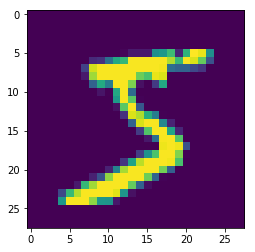

In [37]:
plt.imshow(exmpl)

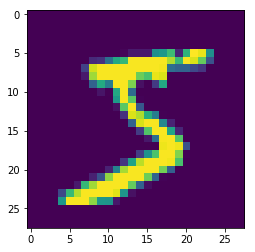

In [38]:
exmpl=(exmpl*127.5)+127.5
plt.imshow(exmpl)

In [39]:
exmpl2=X_train[0,:,:,0]
mask=np.ones((28,28))
print(mask)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [40]:
a=np.array([[1,2],[3,4]])
b=np.array([[5,6],[7,8]])
print(np.multiply(a,b))

[[ 5 12]
 [21 32]]


In [41]:
mask[10:17,10:17]=0.0
print(mask)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

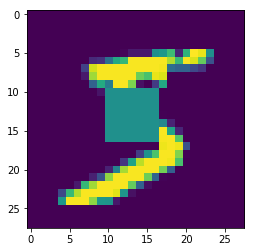

In [46]:
sampl3=X_train[0,:,:,0]
plt.imshow(np.multiply(mask,sampl3))

In [49]:
g1 = generator_model()
g1.compile(loss='binary_crossentropy', optimizer="SGD")
g1.load_weights('generator')
noise1 = np.random.uniform(-1, 1, (1, 100))
gen_image = g1.predict(noise1, verbose=1)

1/1 [==============================] - 0s


In [43]:
mask2=np.zeros((64,64))
print(mask2)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [44]:
mask2[24:40,24:40]=1.0
print(mask2)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [47]:
res1=np.multiply(mask,sampl3)
print(res1.shape)

(28, 28)


In [50]:
print(gen_image.shape)

(1, 28, 28, 1)


In [51]:
gen_image.reshape(28,28)
print(gen_image.shape)

(1, 28, 28, 1)


In [52]:
gen_image2=gen_image[0,:,:,0]
print(gen_image2.shape)

(28, 28)


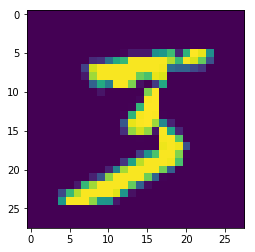

In [53]:
res2=np.multiply(mask2,gen_image2)
res=np.add(res1,res2)
plt.imshow(res)